# Descripción General del método de Máximo descenso

El **Método de Máximo Descenso**, también conocido como **Gradiente Descendente** (*Gradient Descent*), es un algoritmo iterativo de optimización utilizado para encontrar mínimos locales de funciones diferenciables de varias variables $f:\mathbb{R}^n \to \mathbb{R}$.

La premisa fundamental del método es que el **gradiente** de una función en un punto dado ($\nabla f(\mathbf{x}_k)$) apunta en la dirección de *máximo ascenso*. Por lo tanto, moverse en la dirección del **gradiente negativo** ($-\nabla f(\mathbf{x}_k)$) garantiza el *descenso* más rápido posible en el valor de la función, al menos localmente.

Partiendo de un punto inicial $\mathbf{x}_0$, se genera una secuencia de puntos $\mathbf{x}_1, \mathbf{x}_2, \dots$ que se espera converja a un mínimo local de $f$.

## Fórmula del Método

En cada iteración $k$, el siguiente punto $\mathbf{x}_{k+1}$ se calcula mediante la siguiente fórmula de actualización:

$$
\mathbf{x}_{k+1} = \mathbf{x}_k - \alpha_k \, \nabla f(\mathbf{x}_k)
$$

Donde:
- $\mathbf{x}_k \in \mathbb{R}^n$: Es el punto actual en la iteración $k$.
- $\nabla f(\mathbf{x}_k)$: Es el **gradiente** de $f$ evaluado en $\mathbf{x}_k$. Indica la dirección del máximo ascenso.
- $-\nabla f(\mathbf{x}_k)$: Es la **dirección de descenso**.
- $\alpha_k > 0$: Es el **tamaño del paso**.

## Procedimiento Básico

El algoritmo se desarrolla en los siguientes pasos iterativos:

1. **Inicialización:** Escoger un punto inicial $\mathbf{x}_0$ y establecer un criterio de parada (tolerancia $\epsilon$).
2. **Cálculo del Gradiente:** En la iteración $k$, calcular el gradiente $\nabla f(\mathbf{x}_k)$.
3. **Criterio de Parada:** Si $\|\| \, \nabla f(\mathbf{x}_k) \, \|\| < \epsilon$, terminar el proceso.
4. **Determinación del Paso:** Elegir el tamaño del paso $\alpha_k > 0$ (fijo, o mediante un método como la búsqueda de paso óptimo).
5. **Actualización:** Calcular el nuevo punto $\mathbf{x}_{k+1}$ usando la fórmula de actualización.
6. **Repetir:** Incrementar $k \leftarrow k+1$ y volver al paso 2.

## Ventajas y Desventajas

### Ventajas
- **Simplicidad:** Es conceptualmente sencillo y fácil de implementar.
- **Eficiencia Computacional:** Solo requiere el cálculo de las derivadas parciales (el gradiente), no necesita la costosa matriz Hessiana ($\nabla^2 f$).
- **Escalabilidad:** Funciona eficientemente en problemas con un número muy grande de variables (alta dimensionalidad).

### Desventajas
- **Lentitud:** La convergencia puede ser muy lenta cuando la función tiene contornos alargados o presenta un *condicionamiento pobre* (valores propios muy diferentes en la Hessiana), lo que provoca zigzagueo.
- **Dependencia de $\alpha$:** Es sensible a la elección del tamaño de paso. Un $\alpha$ muy grande puede causar **divergencia**; un $\alpha$ muy pequeño provoca **convergencia lenta**.
- **Mínimos Locales:** Garantiza convergencia a un **mínimo local**, no necesariamente al global.

# Descripción General del método de Newton

El **Método de Newton** es un potente algoritmo iterativo de optimización utilizado para encontrar puntos estacionarios (mínimos, máximos o puntos de silla) de una función dos veces diferenciable $f:\mathbb{R}^n \to \mathbb{R}$. A diferencia del Gradiente Descendente, el método utiliza información de la **curvatura** de la función a través de la matriz Hessiana, lo que le confiere una velocidad de convergencia superior cerca del óptimo.

La función $f(\mathbf{x})$ se aproxima localmente en la iteración $k$ mediante una expansión de Taylor de segundo orden alrededor de $\mathbf{x}_k$:

$$
f(\mathbf{x}) \approx f(\mathbf{x}_k) + \nabla f(\mathbf{x}_k)^T (\mathbf{x} - \mathbf{x}_k) + \tfrac{1}{2} (\mathbf{x} - \mathbf{x}_k)^T \, \mathbf{H}_f(\mathbf{x}_k) \, (\mathbf{x} - \mathbf{x}_k)
$$

## Fórmula del Método

En cada iteración $k$, el siguiente punto $\mathbf{x}_{k+1}$ se calcula como:

$$
\mathbf{x}_{k+1} = \mathbf{x}_k - \mathbf{H}_f(\mathbf{x}_k)^{-1} \, \nabla f(\mathbf{x}_k)
$$

Donde:
- $\nabla f(\mathbf{x}_k)$: **vector gradiente** de $f$ en $\mathbf{x}_k$.
- $\mathbf{H}_f(\mathbf{x}_k)$: **matriz Hessiana** de $f$ en $\mathbf{x}_k$, dada por las segundas derivadas parciales:

$$
\mathbf{H}_f(\mathbf{x}) =
\begin{bmatrix}
\tfrac{\partial^2 f}{\partial x_1^2} & \cdots & \tfrac{\partial^2 f}{\partial x_1 \partial x_n} \\
\vdots & \ddots & \vdots \\
\tfrac{\partial^2 f}{\partial x_n \partial x_1} & \cdots & \tfrac{\partial^2 f}{\partial x_n^2}
\end{bmatrix}
$$

El término $\mathbf{p}_k = \mathbf{H}_f(\mathbf{x}_k)^{-1} \, \nabla f(\mathbf{x}_k)$ es la **dirección de Newton**, que ajusta la dirección y el tamaño del paso basándose en la curvatura local.

## Procedimiento Básico

1. **Inicialización:** Escoger un punto inicial $\mathbf{x}_0$ y un criterio de parada $\epsilon$.
2. **Cálculo:** En la iteración $k$, calcular el gradiente $\nabla f(\mathbf{x}_k)$ y la Hessiana $\mathbf{H}_f(\mathbf{x}_k)$.
3. **Criterio de Parada:** Si $\|\| \, \nabla f(\mathbf{x}_k) \, \|\| < \epsilon$, detener el algoritmo.
4. **Resolución del Sistema:** Resolver el sistema lineal para la dirección $\mathbf{p}_k$:

$$
\mathbf{H}_f(\mathbf{x}_k) \, \mathbf{p}_k = \nabla f(\mathbf{x}_k)
$$

5. **Actualización:** Calcular el nuevo punto $\mathbf{x}_{k+1} = \mathbf{x}_k - \mathbf{p}_k$.
6. **Repetir:** Incrementar $k \leftarrow k+1$ y volver al paso 2.

## Ventajas y Desventajas

### Ventajas
- **Convergencia Rápida:** Convergencia **cuadrática** cerca de un mínimo local estricto (típicamente requiere pocas iteraciones).
- **Paso Automático:** La dirección de Newton incorpora el tamaño de paso de la aproximación cuadrática.

### Desventajas
- **Alto Costo Computacional:** Requiere calcular/almacenar/resolver con la Hessiana (coste $\mathcal{O}(n^2)$ derivadas por iteración).
- **Problemas con la Hessiana:** Si $\mathbf{H}_f(\mathbf{x}_k)$ no es definida positiva (singular o indefinida), el método puede fallar o ir a un máximo/punto silla.
- **Sensibilidad:** Depende del punto inicial, especialmente en regiones no convexas (comportamiento errático).

# Análisis de Métodos para la Optimización de $f(x, y)$

## Método de Máximo Descenso (Gradiente)

### Razones para su Uso
- **Facilidad de Implementación:** Conceptualmente sencillo y con cálculos básicos.
- **Requisito Mínimo:** Solo requiere el **gradiente** $\nabla f(x, y)$:

$$
\nabla f(x, y) =
\begin{bmatrix}
2x + 20\cos(x)\sin(x) + \tfrac{20x}{30} \sin\!\left(\tfrac{x^2}{30}\right) \\
2y
\end{bmatrix}
$$

- **Exploración:** Útil para explorar regiones amplias y encontrar mínimos locales.

### Limitaciones
- **Lentitud:** Puede zigzaguear si los términos oscilatorios del gradiente hacen variar bruscamente la superficie.
- **Sensibilidad a $\mathbf{x}_0$:** Puede quedar atrapado en mínimos locales.
- **Dependencia de $\alpha$:** Requiere ajuste cuidadoso del tamaño de paso.

## Método de Newton

### Razones para su Uso
- **Curvatura:** Utiliza la **Hessiana** $\mathbf{H}_f(x, y)$, que incorpora la curvatura de la función:

$$
\mathbf{H}_f(x,y) =
\begin{bmatrix}
2 + 20\cos(2x) + \tfrac{2}{3}\sin\!\left(\tfrac{x^2}{30}\right) + \tfrac{2x^2}{45}\cos\!\left(\tfrac{x^2}{30}\right) & 0 \\
0 & 2
\end{bmatrix}
$$

- **Convergencia Rápida:** Puede converger muy rápido (cuadrática) cerca de un mínimo local.
- **Ajuste del Paso:** Dirección y magnitud del paso se ajustan con la curvatura.

### Limitaciones
- **Inestabilidad de la Hessiana:** Por los términos $\cos(2x)$, la entrada (1,1) puede ser negativa; $\mathbf{H}_f$ puede no ser definida positiva.
- **Costo Computacional:** Para alta dimensionalidad, calcular y usar la Hessiana es costoso.
- **Multimodalidad:** No garantiza mínimo global cuando la función es multimodal.

In [7]:
import numpy as np

def f(x, y):
    return x**2 + y**2 - 10*(np.cos(x))**2 - 10*np.cos(x**2 / 30)

def grad_f(x, y):
    df_dx = 2*x + 20*np.cos(x)*np.sin(x) + (20*x/30)*np.sin(x**2 / 30)
    df_dy = 2*y
    return np.array([df_dx, df_dy])

def hess_f(x, y):
    d2f_dx2 = 2 + 20*(np.cos(2*x)) + (2/3)*np.sin(x**2 / 30) + (2*x**2/45)*np.cos(x**2 / 30)
    d2f_dy2 = 2
    d2f_dxdy = 0
    return np.array([[d2f_dx2, d2f_dxdy], [d2f_dxdy, d2f_dy2]])

def inv_hess_f(x, y, eps=1e-6):
    d2f_dx2 = 2 + 20*np.cos(2*x) + (2/3)*np.sin(x**2 / 30) + (2*x**2/45)*np.cos(x**2 / 30)
    d2f_dy2 = 2
    d2f_dxdy = 0

    if abs(d2f_dx2) < eps:
        d2f_dx2 = eps * np.sign(d2f_dx2 if d2f_dx2 != 0 else 1)

    return np.array([[1/d2f_dx2, 0],[0, 1/d2f_dy2]])

def maximo_descenso(x0, lr=0.01, iterations=100, tol=1e-6):
    x = np.array(x0, dtype=float)
    history = [x.copy()]
    for _ in range(iterations):
        grad = grad_f(x[0], x[1])
        if np.linalg.norm(grad) < tol:
            break
        x -= lr * grad
        history.append(x.copy())
    return np.array(history)


def newton(x0, iterations=50, tol=1e-6):
    x = np.array(x0, dtype=float)
    history = [x.copy()]
    for _ in range(iterations):
        grad = grad_f(x[0], x[1])
        if np.linalg.norm(grad) < tol:
            break
        try:
            H_inv = inv_hess_f(x[0], x[1])
        except np.linalg.LinAlgError:
            break
        dx = H_inv.dot(grad)
        if np.linalg.norm(dx) < tol:
            break
        x -= dx
        history.append(x.copy())
    return np.array(history)

In [8]:
import json

def save_results(resultados, nombre_archivo="resultados.json"):
    with open(nombre_archivo, "w") as f:
        json.dump(resultados, f, indent=4)
    print(f"✅ Resultados guardados en {nombre_archivo}")

In [9]:
def execute_experiments():
    resultados = []
    puntos_iniciales = [(10*i, 10*j) for i in range(0, 11) for j in range(0, 11) if (i%2 ==1 and j%2==1) or (i==0 and j%2==1) or (j==0 and i%2==1) or (i==0 and j==0)]
    puntos_iniciales += [(-10*i, 10*j) for i in range(0, 11) for j in range(0, 11) if (i%2 ==1 and j%2==1) or (i==0 and j%2==1) or (j==0 and i%2==1) or (i==0 and j==0)]
    puntos_iniciales += [(-10*i, -10*j) for i in range(0, 11) for j in range(0, 11) if (i%2 ==1 and j%2==1) or (i==0 and j%2==1) or (j==0 and i%2==1) or (i==0 and j==0)]
    puntos_iniciales += [(10*i, -10*j) for i in range(0, 11) for j in range(0, 11) if (i%2 ==1 and j%2==1) or (i==0 and j%2==1) or (j==0 and i%2==1) or (i==0 and j==0)]
    step_size = [0.001, 0.01, 0.1]
    iterations_list = [50, 1000, 200]

    for x0 in puntos_iniciales:
        for lr in step_size:
            for steps in iterations_list:
                # Máximo descenso
                historia_md = maximo_descenso(x0, lr, steps)
                resultados.append({
                    "algoritmo": "maximo_descenso",
                    "x0": x0,
                    "lr": lr,
                    "iteraciones": steps,
                    "trayectoria": [p.tolist() for p in historia_md],
                    "ultimo": historia_md[-1].tolist(),
                    "valor": float(f(*historia_md[-1]))
                })


        for steps in iterations_list:
            # Newton
            historia_n = newton(x0, steps)
            resultados.append({
                "algoritmo": "newton",
                "x0": x0,
                "iteraciones": steps,
                "trayectoria": [p.tolist() for p in historia_n],
                "ultimo": historia_n[-1].tolist(),
                "valor": float(f(*historia_n[-1]))
            })


    save_results(resultados)

execute_experiments()

✅ Resultados guardados en resultados.json


In [ ]:
import pandas as pd
import json

with open("resultados.json", "r") as archivo:
    resultados = json.load(archivo)

filas = []
for r in resultados:
    filas.append({
        "algoritmo": r["algoritmo"],
        "x0_x": r["x0"][0],
        "x0_y": r["x0"][1],
        "lr": r.get("lr"),
        "iteraciones_param": r["iteraciones"],
        "pasos_realizados": len(r["trayectoria"]),
        "valor_final": r["valor"]
    })

tabla_experimentos = pd.DataFrame(filas)

tabla_experimentos = tabla_experimentos.sort_values("valor_final").reset_index(drop=True)

print(f"Total de experimentos: {len(tabla_experimentos)}")
display(tabla_experimentos.head(50))  # Ajustar en caso de querer más o menos filas

Total de experimentos: 1728


,algoritmo,x0_x,x0_y,lr,iteraciones_param,pasos_realizados,valor_final
0,maximo_descenso,0,0,0.001,50,1,-20.0
1,maximo_descenso,0,0,0.001,1000,1,-20.0
2,maximo_descenso,0,0,0.001,200,1,-20.0
3,maximo_descenso,0,0,0.010,50,1,-20.0
4,maximo_descenso,0,0,0.010,1000,1,-20.0
5,maximo_descenso,0,0,0.010,200,1,-20.0
6,maximo_descenso,0,0,0.100,50,1,-20.0
7,maximo_descenso,0,0,0.100,1000,1,-20.0
8,maximo_descenso,0,0,0.100,200,1,-20.0
9,newton,0,30,NaN,200,2,-20.0


In [ ]:
import matplotlib.pyplot as plt

def graficate(case):

    xs = np.linspace(-100, 100, 200)
    ys = np.linspace(-100, 100, 200)
    X, Y = np.meshgrid(xs, ys)
    Z = f(X, Y)
    from collections import defaultdict
    experimentos = defaultdict(list)
    experimentos[tuple(case["x0"])].append(case)

    cmap = plt.get_cmap('tab20')

    for x0, res_exp in experimentos.items():
        fig = plt.figure(figsize=(16, 7))

        # --- 3D ---
        ax3d = fig.add_subplot(1, 2, 1, projection='3d')
        ax3d.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

        handles = []
        labels = []

        for idx, r in enumerate(res_exp):
            tray = np.array(r["trayectoria"])
            tray_z = f(tray[:,0], tray[:,1])
            color = cmap(idx % 20)

            ax3d.plot(tray[:,0], tray[:,1], tray_z, '.-', color=color, markersize=5)

            ax3d.scatter(tray[0,0], tray[0,1], tray_z[0], s=70, color=color, marker='o')
            ax3d.scatter(tray[-1,0], tray[-1,1], tray_z[-1], s=50, color='black')

            pasos = len(r["trayectoria"]) if isinstance(r.get("trayectoria"), list) else 0
            label = f"{r['algoritmo']}, x0={r['x0']}, pasos={pasos}"
            if "lr" in r:
                label += f", lr={r['lr']}"
            if "valor" in r:
                label += f", valor_final={r['valor']:.6f}"
            handles.append(ax3d.plot([], [], color=color, marker='o')[0])
            labels.append(label)

        ax3d.set_title(f"3D (elev=30°, azim=45°) para x0={x0}")
        ax3d.set_xlabel("X")
        ax3d.set_ylabel("Y")
        ax3d.set_zlabel("f(X, Y)")
        ax3d.view_init(elev=30, azim=45)
        ax3d.legend(handles, labels, fontsize=9, loc='upper left', bbox_to_anchor=(1, 1))

        # --- 2D Contour ---
        ax2d = fig.add_subplot(1, 2, 2)
        cp = ax2d.contourf(X, Y, Z, levels=50, cmap='viridis')
        fig.colorbar(cp, ax=ax2d, label='f(X, Y)')

        for idx, r in enumerate(res_exp):
            tray = np.array(r["trayectoria"])
            color = cmap(idx % 20)
            ax2d.plot(tray[:,0], tray[:,1], '.-', color=color, markersize=5)
            ax2d.scatter(tray[0,0], tray[0,1], s=70, color=color, marker='o')
            ax2d.scatter(tray[-1,0], tray[-1,1], s=50, color='black')

        ax2d.set_title(f"2D Contour para x0={x0}")
        ax2d.set_xlabel("X")
        ax2d.set_ylabel("Y")

        plt.tight_layout()
        plt.show()

In [29]:
with open("resultados.json", "r") as archivo:
    resultados = json.load(archivo)

def find_case(resultados, algoritmo, x0, lr=None, iterations=None):
    """Filtra casos por algoritmo, x0 y (opcional) lr e iteraciones (parámetro).
    Devuelve el primer caso que cumpla los filtros y reporta pasos (len(trayectoria)).
    """
    matches = [r for r in resultados if r['algoritmo']==algoritmo and r['x0'][0]==x0[0] and r['x0'][1]==x0[1]]
    if lr is not None:
        matches = [r for r in matches if r.get('lr') == lr]
    if iterations is not None:
        matches = [r for r in matches if r.get('iteraciones') == iterations]
    if not matches:
        raise ValueError(f"No hay coincidencias para {algoritmo}, x0={x0}, lr={lr}, iteraciones={iterations}")
    elegido = matches[0]
    return elegido

case_newton_ideal = find_case(resultados, 'newton', [0, 90])
case_newton_fail = find_case(resultados, 'newton', [50, 50])
case_gd_lr_01 = find_case(resultados, 'maximo_descenso', [0, 90], lr=0.1, iterations=1000)
case_gd_lr_001 = find_case(resultados, 'maximo_descenso', [0, 90], lr=0.01, iterations=1000)
case_gd_lr_0001 = find_case(resultados, 'maximo_descenso', [0, 90], lr=0.001, iterations=1000)

## 1) Newton: Convergencia ideal desde x0=[0, 90]
Este experimento muestra el mejor escenario y el máximo rendimiento del método de Newton. Encontró el mínimo global en un solo paso, ilustrando su capacidad de convergencia rápida cuando se inicia en la región correcta.

- Algoritmo: newton
- x0: [0, 90]
- Valor : -20
- Iteraciones: 1

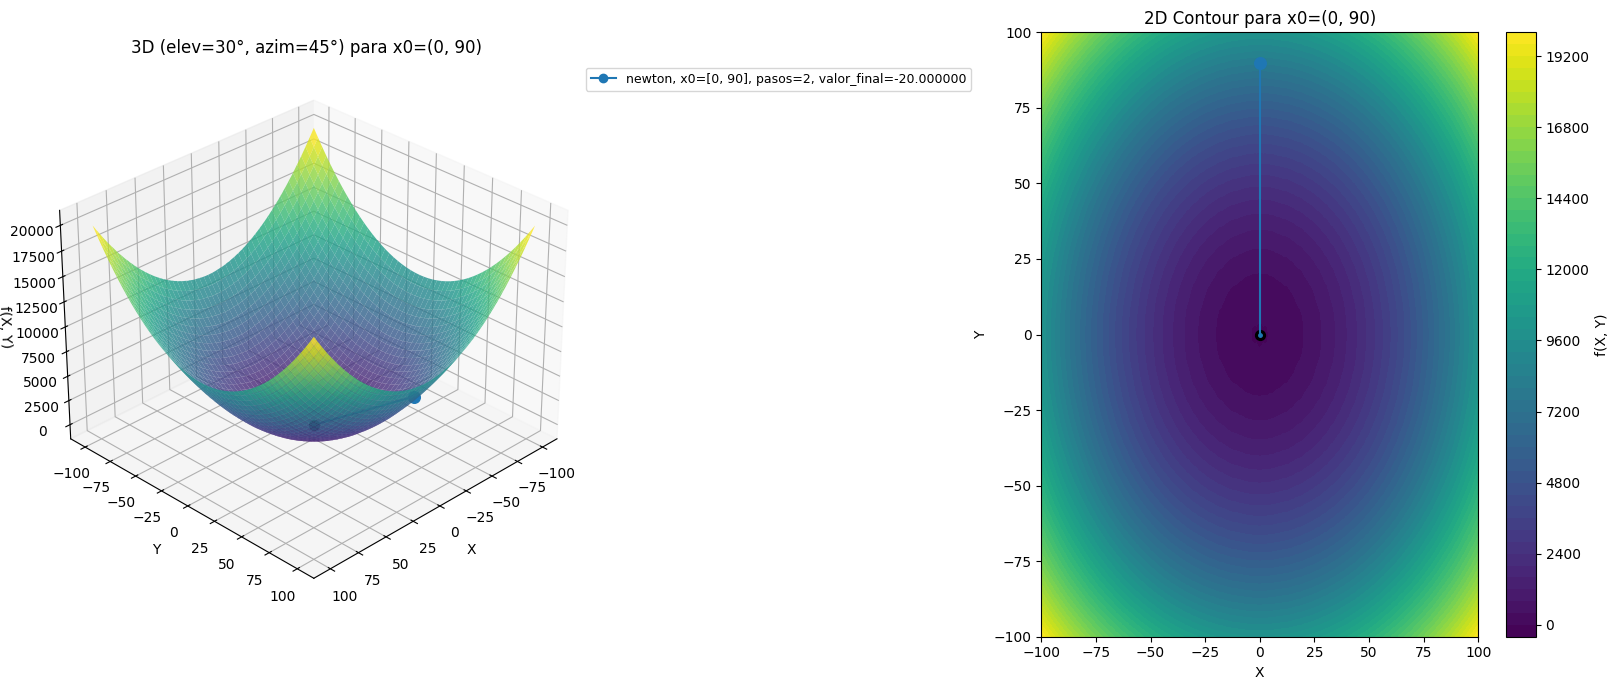

In [27]:
graficate(case_newton_ideal)

## 2) Newton: Sensibilidad al punto inicial (x0=[50, 50])
Este experimento es el contraste directo del anterior. Muestra la extrema sensibilidad del método de Newton al punto de inicio. A pesar de su rapidez, solo se necesita un ligero cambio en $x_0$ para que converja a un punto estacionario incorrecto con un valor muy alto, ilustrando la inestabilidad del algoritmo en funciones no convexas.

- Algoritmo: newton
- x0: [50, 50]
- Valor final: 885.98
- Iteraciones: 2

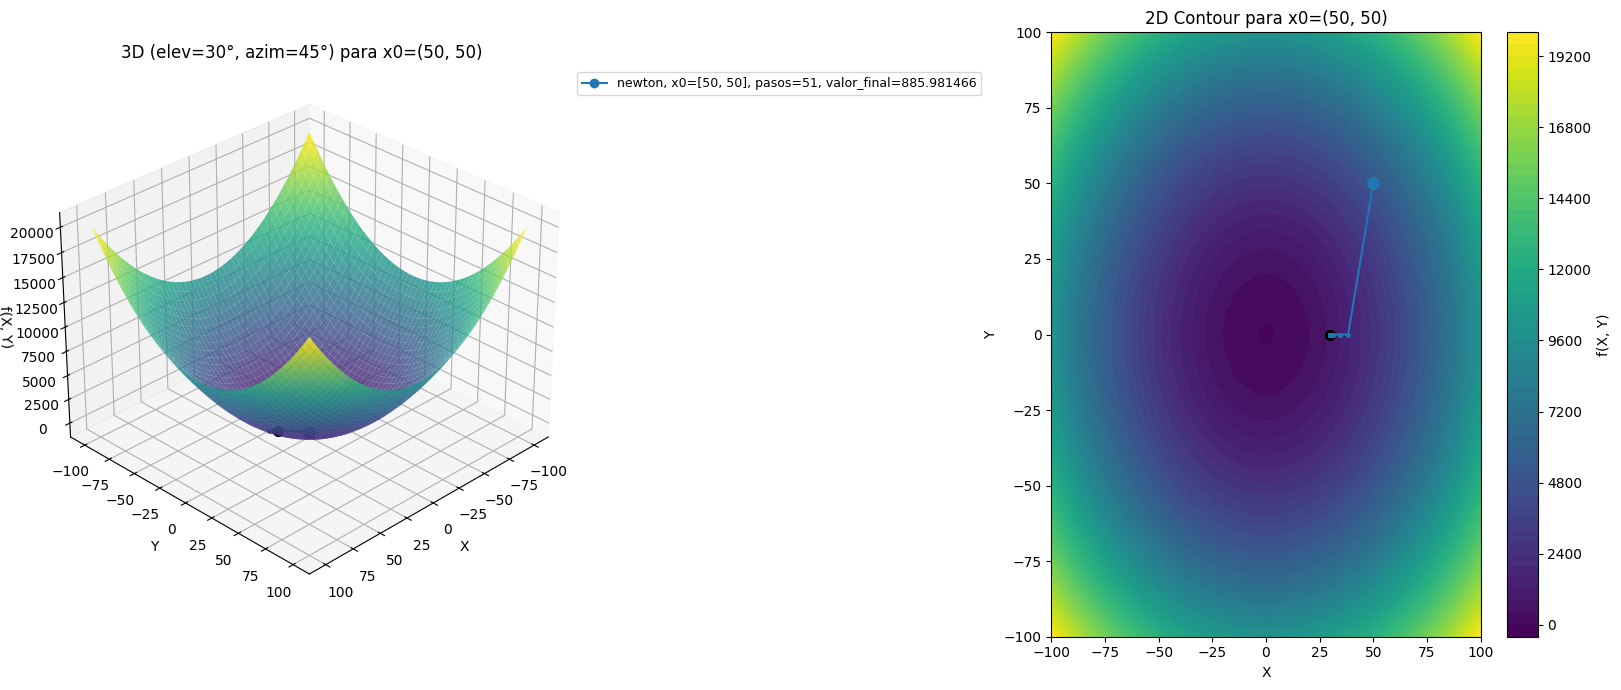

In [28]:
graficate(case_newton_fail)

## 3) Máximo Descenso (lr=0.1): Rendimiento robusto y eficiente
Este es el caso más eficiente del algoritmo de Máximo Descenso. Se puede comparar directamente con el caso ideal de Newton. Muestra que, con un learning rate (lr) bien elegido, el algoritmo converge al óptimo de manera segura, aunque es significativamente más lento que Newton, demostrando su robustez.

- Algoritmo: maximo_descenso
- x0: [0, 90]
- lr: 0.1
- Valor final : -20
- Iteraciones: 87

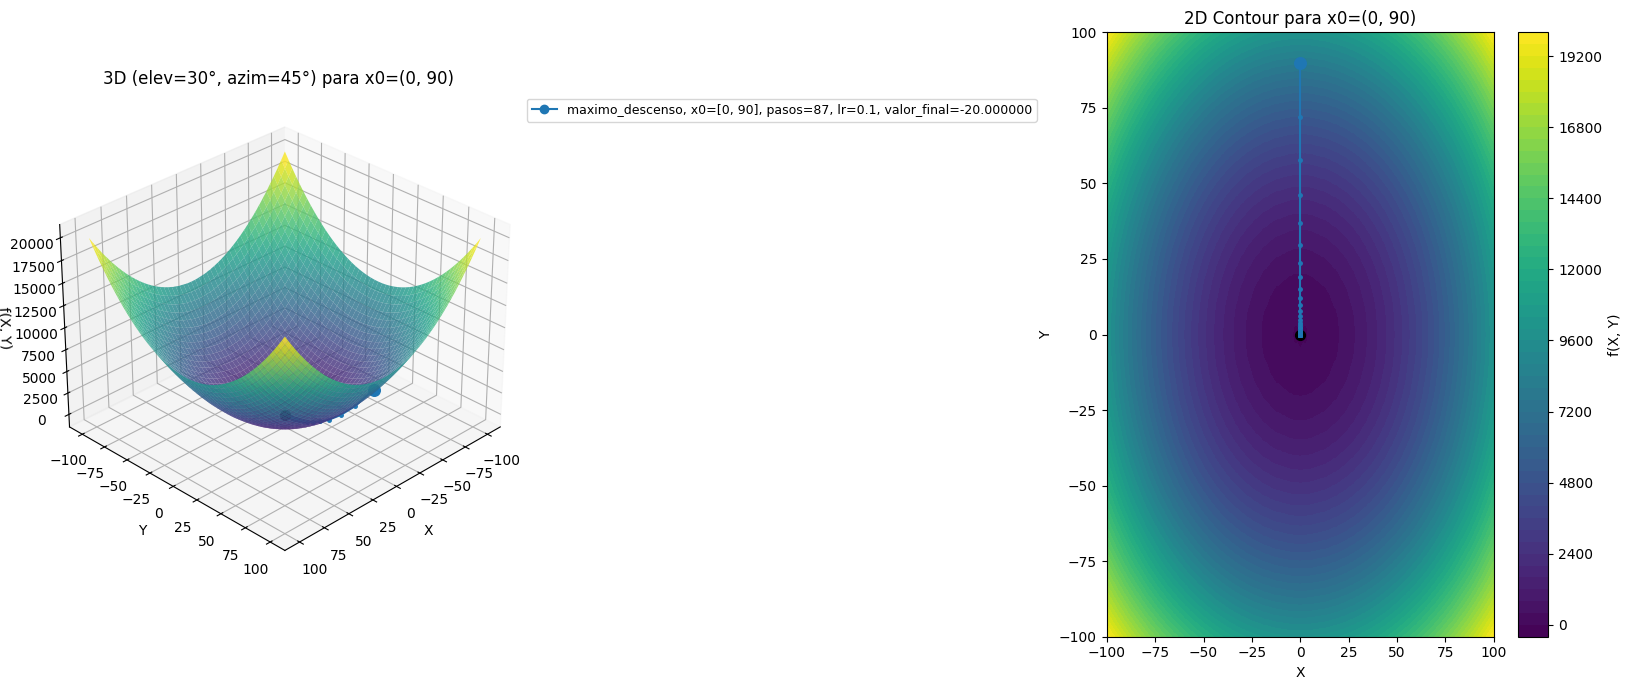

In [24]:
graficate(case_gd_lr_01)

## 4) Máximo Descenso (lr=0.01): Convergencia lenta (1000 pasos)
Este experimento ilustra la sensibilidad a los parámetros. Demuestra que un $lr$ diez veces menor sigue llevando a la convergencia, pero a cuesta muchas más iteraciones.

- Algoritmo: maximo_descenso
- x0: [0, 90]
- lr: 0.01
- Valor final: -20
- Iteraciones: 942

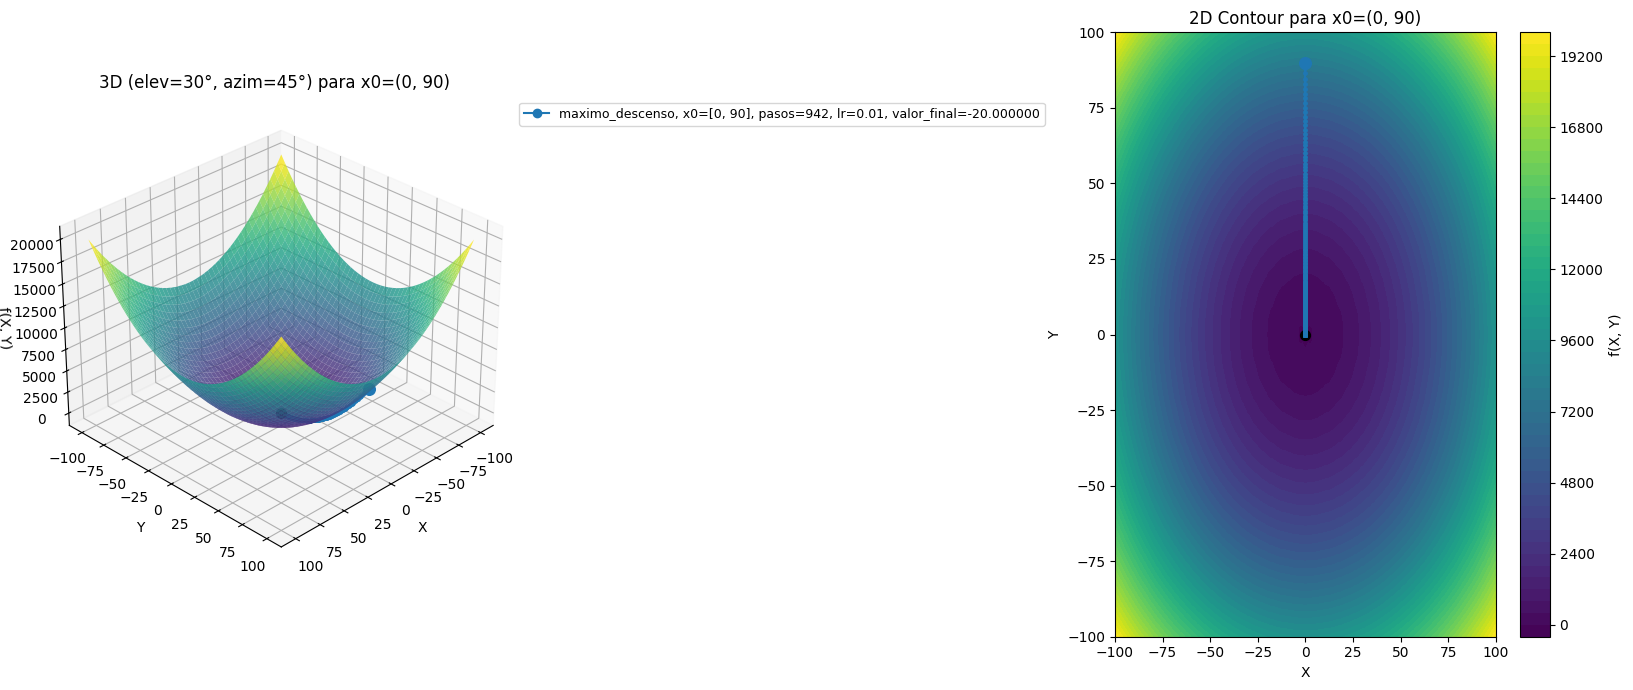

In [25]:
graficate(case_gd_lr_001)

## 5) Máximo Descenso (lr=0.001): Avance insuficiente
Con un lr demasiado pequeño, aunque se realizan muchos pasos, el algoritmo no avanza lo suficiente y queda lejos del óptimo, evidenciando la importancia crítica de ajustar el lr.

- Algoritmo: maximo_descenso
- x0: [0, 90]
- lr: 0.001
- Valor final: 127.76
- Iteraciones: 1000

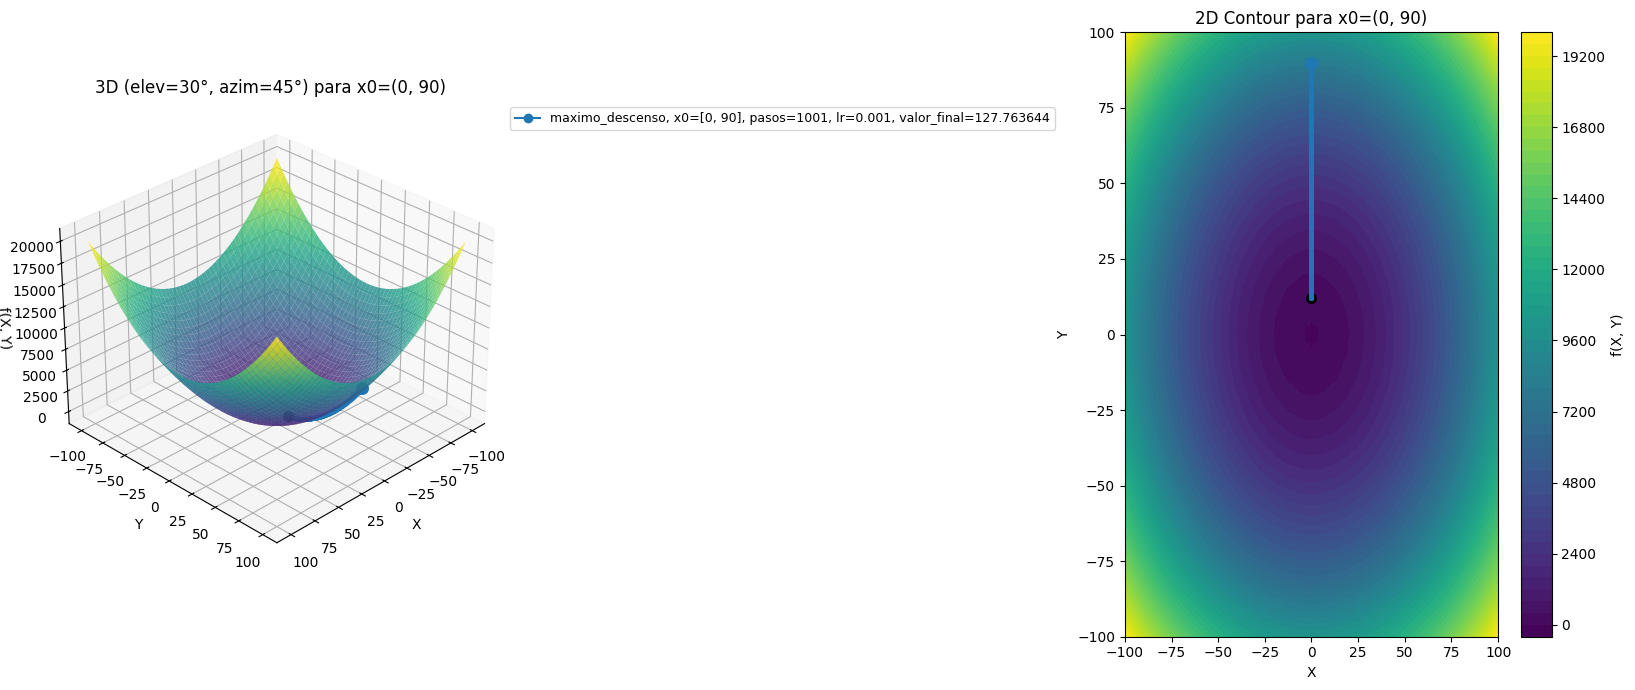

In [26]:
graficate(case_gd_lr_0001)